# 4. Formulación matricial del modelo OLS (Mínimos cuadrados)

## 4.1 Explicación forma matricial

Para la formulación matricial del modelo lineal se expresa de la siguiente manera:

$$X\beta + \epsilon= Y$$

Donde:
* __$\beta$__ es una matriz de coeficientes de tamaño $(p+1)\times1$, que contiene los coeficientes $\beta_0, \beta_1,...,\beta_{p}$
* __X__ es una matriz de variables regresoras de tamaño $n \times (p+1)$, donde la primera columna de cada fila debe tener valor 1, y el resto de valores corresponde a los $p$ atributos que serán usados para determinar Y, para cada una de las n observaciones.
* __$\epsilon$__ es una matriz de tamaño $n \times 1$ que contiene los errores entre la predicción obtenida del modelo lineal y la variable objetivo __Y__
* __Y__ es una matriz de tamaño $n \times 1$ las observaciones obtenidas de la variable objetivo.

Recordamos que el objetivo del metodo de mínimos cuadrados es minimizar la función de pérdida, dada por:
$$S(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})'(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$


Para minimar el error, es necesario derivar la expresión anterior, para lo cual la expandimos:

$$
\begin{aligned}
S(\boldsymbol{\beta})
&= (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})'(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) \\
&= \mathbf{y}' \mathbf{y}
   - \mathbf{y}' \mathbf{X}\boldsymbol{\beta}
   - (\mathbf{X}\boldsymbol{\beta})' \mathbf{y}
   + (\mathbf{X}\boldsymbol{\beta})' (\mathbf{X}\boldsymbol{\beta}) \\
&= \mathbf{y}' \mathbf{y}
   - 2\boldsymbol{\beta}' \mathbf{X}' \mathbf{y}
   + \boldsymbol{\beta}' \mathbf{X}' \mathbf{X} \boldsymbol{\beta}.
\end{aligned}
$$


(Usamos que $(\mathbf{y}^\top\mathbf{X}\boldsymbol{\beta})^\top = \boldsymbol{\beta}^\top\mathbf{X}^\top\mathbf{y}$, ya que ambos son escalares.)

---

Aplicamos las reglas de derivación matricial:

$$
\frac{\partial (\mathbf{y}' \mathbf{y})}{\partial \boldsymbol{\beta}} = 0
$$

$$
\frac{\partial (-2\boldsymbol{\beta}' \mathbf{X}' \mathbf{y})}{\partial \boldsymbol{\beta}} = -2\mathbf{X}' \mathbf{y}
$$


$$
\frac{\partial (\boldsymbol{\beta}' \mathbf{X}' \mathbf{X} \boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 2\mathbf{X}' \mathbf{X}\boldsymbol{\beta}
$$



Sumando los términos:
$$
\nabla_{\boldsymbol{\beta}} S(\boldsymbol{\beta})
= -2\mathbf{X}' \mathbf{y} + 2\mathbf{X}' \mathbf{X}\boldsymbol{\beta}
= 2\mathbf{X}'(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})
$$


---



Para encontrar el valor de $\boldsymbol{\beta}$ que minimiza $S(\boldsymbol{\beta})$, se iguala la derivada a cero:

$$\frac{\partial S(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = -2\mathbf{X}'(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) = 0$$

$$\Rightarrow \mathbf{X}'\mathbf{X}\boldsymbol{\beta} = \mathbf{X}'\mathbf{y}$$

$$\Rightarrow \boxed{\hat{\boldsymbol{\beta}} = (\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{y}}$$

Esta es la **solución matricial de los Mínimos Cuadrados Ordinarios (OLS)**.

Ahora bien, para que el determinante de $(X'X)$ sea distinto de 0 y, por tanto, sea invertible, todas las n filas de observaciones deben ser linealmente independientes las unas contras, es decir, no pude existir una combinación lineal tal que al aplicarlas a una de las observaciones se obtenga como resultado otra de las observaciones.

Expresado en terminos más simples, cada observación debe ser independiente de la otra, y no puede existir correlaciones entre ellas.

En base a esta discusión, armamos nuestra matriz X y Y:

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pickle    

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '../Data/'

df = pd.read_csv(path+'hour-processed.csv', delimiter=',', index_col=0)

In [4]:
df

,temp,atemp,hum,windspeed,yr,hr_sin,hr_cos,weekday_sin,weekday_cos,day_sin,...,weekend,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,casual,registered,cnt
0,-1.334648,-1.093281,0.947768,-1.596452,-1.005134,0.006379,1.418362,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0
1,-1.438516,-1.181732,0.895902,-1.596452,-1.005134,0.372567,1.370193,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,32.0,40.0
2,-1.438516,-1.181732,0.895902,-1.596452,-1.005134,0.713799,1.228971,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,27.0,32.0
3,-1.334648,-1.093281,0.636571,-1.596452,-1.005134,1.006822,1.004318,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,13.0
4,-1.334648,-1.093281,0.636571,-1.596452,-1.005134,1.231667,0.711546,-1.101806,0.876391,0.276861,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-1.269602,-0.141423,-0.207208,0.994892,-1.360252,0.370605,1.111124,0.876391,-0.005234,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,108.0,119.0
17375,-1.230779,-1.269602,-0.141423,-0.207208,0.994892,-1.218909,0.711546,1.111124,0.876391,-0.005234,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,81.0,89.0
17376,-1.230779,-1.269602,-0.141423,-0.207208,0.994892,-0.994064,1.004318,1.111124,0.876391,-0.005234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,83.0,90.0
17377,-1.230779,-1.181732,-0.348888,-0.460182,0.994892,-0.701041,1.228971,1.111124,0.876391,-0.005234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,48.0,61.0


Dado que nuestra variable objetivo *cnt* es igual a la suma de $casual + registered$, exploraremos 2 opciones:

* Crear 2 modelos lineales que estimen los usuarios casuales y registrados cada uno y se calcula *cnt* como la suma de lo predicho por ambos modelos.
* Crear 1 solo modelo que prediga *cnt*

In [5]:
# Se define la variable objetivo
target_column = ['casual', 'registered', 'cnt']

target_column

['casual', 'registered', 'cnt']

In [6]:
regressor_columns = [column for column in df.columns if column not in target_column]

regressor_columns

['temp',
 'atemp',
 'hum',
 'windspeed',
 'yr',
 'hr_sin',
 'hr_cos',
 'weekday_sin',
 'weekday_cos',
 'day_sin',
 'day_cos',
 'mnth_sin',
 'mnth_cos',
 'holiday',
 'workingday',
 'rush_hour',
 'weekend',
 'season_2',
 'season_3',
 'season_4',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4']

In [7]:
# Matriz X en numpy
X = df[regressor_columns].to_numpy()

## se insertan los unos en cada fila para el cálculo del intercepto
X_1 = np.insert(X, obj=0, values=1, axis=1)

X_1

array([[ 1.        , -1.33464759, -1.0932806 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.4385164 , -1.18173227, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.4385164 , -1.18173227, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -1.23077877, -1.26960201, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.23077877, -1.18173227, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.23077877, -1.18173227, ...,  0.        ,
         0.        ,  0.        ]], shape=(17379, 24))

In [8]:
# De la misma forma, se crea la matriz Y
Y_casual = df['casual'].to_numpy()
Y_registered = df['registered'].to_numpy()

Y_cnt = df['cnt'].to_numpy()

## Le damos la form n x 1
Y_casual = np.expand_dims(Y_casual, axis=1)
Y_registered = np.expand_dims(Y_registered, axis=1)

Y_cnt = np.expand_dims(Y_cnt, axis=1)

In [9]:
Y_casual

array([[ 3.],
       [ 8.],
       [ 5.],
       ...,
       [ 7.],
       [13.],
       [12.]], shape=(17379, 1))

In [10]:
Y_registered

array([[13.],
       [32.],
       [27.],
       ...,
       [83.],
       [48.],
       [37.]], shape=(17379, 1))

In [11]:
Y_cnt

array([[16.],
       [40.],
       [32.],
       ...,
       [90.],
       [61.],
       [49.]], shape=(17379, 1))

# 4.2 Análisis de multicolinealidad

Analizamos multicolinealidad, usando VIF, donde encontramos que las variables temp, atemp, workingday sufren de alta colinealidad.

* *temp* y *atemp* probablemente se correlación entre sí.
* workingday probablemente se correlaciona con weekend y holiday.
* mnth ya vimos que tenía patrones similares a los de temperatura. 

Decidimos entonces eliminar de nuestro conjunto de variables regresoras las variables *atemp*, *workingday* y *mnth_cos*

In [24]:
vif_data2 = pd.DataFrame()
vif_data2["Variable"] = regressor_columns
vif_data2["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print("\nFactores de inflación de la varianza (VIF):")
print(vif_data2)

# =============================
# 3. Interpretación
# =============================
print("\nInterpretación:")
for var, vif in zip(vif_data2["Variable"], vif_data2["VIF"]):
    if vif < 5:
        print(f"{var}: Sin multicolinealidad significativa (VIF={vif:.2f})")
    elif vif < 10:
        print(f"{var}: Multicolinealidad moderada (VIF={vif:.2f})")
    else:
        print(f"{var}: Alta multicolinealidad (VIF={vif:.2f}) — considerar eliminar o combinar variables.")


Factores de inflación de la varianza (VIF):
        Variable        VIF
0           temp  53.328249
1          atemp  45.814747
2            hum   1.858216
3      windspeed   1.235134
4             yr   1.024743
5         hr_sin   1.437325
6         hr_cos   1.315381
7    weekday_sin   1.359206
8    weekday_cos   2.627711
9        day_sin   1.014420
10       day_cos   1.001290
11      mnth_sin   5.162478
12      mnth_cos   7.563050
13       holiday   1.347085
14    workingday   9.531094
15     rush_hour   1.052955
16       weekend   5.680182
17      season_2   4.279572
18      season_3   7.178962
19      season_4   4.127415
20  weathersit_2   1.191403
21  weathersit_3   1.311092
22  weathersit_4   1.002489

Interpretación:
temp: Alta multicolinealidad (VIF=53.33) — considerar eliminar o combinar variables.
atemp: Alta multicolinealidad (VIF=45.81) — considerar eliminar o combinar variables.
hum: Sin multicolinealidad significativa (VIF=1.86)
windspeed: Sin multicolinealidad significat

In [30]:
regressor_columns = [regressor for regressor in regressor_columns if regressor not in ['atemp', 'workingday', 'mnth_cos']]

regressor_columns

['temp',
 'hum',
 'windspeed',
 'yr',
 'hr_sin',
 'hr_cos',
 'weekday_sin',
 'weekday_cos',
 'day_sin',
 'day_cos',
 'mnth_sin',
 'holiday',
 'rush_hour',
 'weekend',
 'season_2',
 'season_3',
 'season_4',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4']

In [31]:
# Matriz X en numpy
X = df[regressor_columns].to_numpy()

## se insertan los unos en cada fila para el cálculo del intercepto
X_1 = np.insert(X, obj=0, values=1, axis=1)

X_1

array([[ 1.        , -1.33464759,  0.94776791, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.4385164 ,  0.89590169, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.4385164 ,  0.89590169, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -1.23077877, -0.14142266, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.23077877, -0.34888753, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.23077877,  0.11790843, ...,  0.        ,
         0.        ,  0.        ]], shape=(17379, 21))

Realizamos nuevamente nuestro analisis de multicolinealidad, donde encontramos mejores resultados.

In [32]:
vif_data2 = pd.DataFrame()
vif_data2["Variable"] = regressor_columns
vif_data2["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print("\nFactores de inflación de la varianza (VIF):")
print(vif_data2)

# =============================
# 3. Interpretación
# =============================
print("\nInterpretación:")
for var, vif in zip(vif_data2["Variable"], vif_data2["VIF"]):
    if vif < 5:
        print(f"{var}: Sin multicolinealidad significativa (VIF={vif:.2f})")
    elif vif < 10:
        print(f"{var}: Multicolinealidad moderada (VIF={vif:.2f})")
    else:
        print(f"{var}: Alta multicolinealidad (VIF={vif:.2f}) — considerar eliminar o combinar variables.")


Factores de inflación de la varianza (VIF):
        Variable       VIF
0           temp  2.863496
1            hum  1.810020
2      windspeed  1.162902
3             yr  1.018514
4         hr_sin  1.343685
5         hr_cos  1.271196
6    weekday_sin  1.322520
7    weekday_cos  2.450547
8        day_sin  1.009954
9        day_cos  1.000875
10      mnth_sin  3.890502
11       holiday  1.072672
12     rush_hour  1.369165
13       weekend  3.747679
14      season_2  2.137493
15      season_3  3.001923
16      season_4  2.538436
17  weathersit_2  1.516689
18  weathersit_3  1.388499
19  weathersit_4  1.002243

Interpretación:
temp: Sin multicolinealidad significativa (VIF=2.86)
hum: Sin multicolinealidad significativa (VIF=1.81)
windspeed: Sin multicolinealidad significativa (VIF=1.16)
yr: Sin multicolinealidad significativa (VIF=1.02)
hr_sin: Sin multicolinealidad significativa (VIF=1.34)
hr_cos: Sin multicolinealidad significativa (VIF=1.27)
weekday_sin: Sin multicolinealidad significativ

## 4.3 Regresión lineal matricial

Calculamos nuestros vectores de coeficientes usando la forma matricial:

In [33]:
# Encontramos B usando la forma matricial
np.set_printoptions(suppress=True)

B_casual = (np.linalg.inv(X_1.T@X_1))@X_1.T@Y_casual

B_casual

array([[ 25.10420337],
       [ 17.28093998],
       [ -5.15553635],
       [ -1.71819897],
       [  5.94104151],
       [-13.97352165],
       [-16.82017621],
       [ -2.96017133],
       [  2.61474049],
       [  0.19956066],
       [ -0.958566  ],
       [ -1.69096507],
       [ 20.96863511],
       [ -1.82326221],
       [ 28.35169926],
       [ 12.40856077],
       [ -1.73825672],
       [  5.34427244],
       [ -3.32631214],
       [-10.80483328],
       [ -3.59480217]])

In [34]:
B_registered = (np.linalg.inv(X_1.T@X_1))@X_1.T@Y_registered

B_registered

array([[105.83277668],
       [ 27.09552523],
       [ -7.08923938],
       [ -1.84181167],
       [ 36.96376369],
       [-45.37200288],
       [-35.86624908],
       [ -0.20572405],
       [ -3.92191808],
       [  1.71657665],
       [ -2.76018967],
       [ -5.727759  ],
       [-50.06770093],
       [161.04167913],
       [-33.71659176],
       [ 32.81561052],
       [ 20.59401688],
       [ 48.94849589],
       [ -8.72906505],
       [-56.64359966],
       [-56.20632089]])

In [35]:
B_cnt = (np.linalg.inv(X_1.T@X_1))@X_1.T@Y_cnt

B_cnt

array([[130.93698006],
       [ 44.37646521],
       [-12.24477573],
       [ -3.56001064],
       [ 42.9048052 ],
       [-59.34552453],
       [-52.68642529],
       [ -3.16589538],
       [ -1.30717759],
       [  1.91613731],
       [ -3.71875567],
       [ -7.41872407],
       [-29.09906582],
       [159.21841693],
       [ -5.3648925 ],
       [ 45.22417129],
       [ 18.85576016],
       [ 54.29276832],
       [-12.05537718],
       [-67.44843294],
       [-59.80112305]])

Calculamos los valores predichos para el método 1 y el método 2:

In [36]:
Y_pred_1 = X_1@B_casual + X_1@B_registered

Y_pred_2 = X_1@B_cnt

In [37]:
Y_pred_1.shape

(17379, 1)

Al comparar ambos resultados, notamos que nos arrojan como valor predicho exactamente los mismos resultados. Esto se debe a que calcular la regrasión de la suma de los componentes de una combinación lineal es igual a sumar las regresiones individuales de cada componente. 

Por tanto, se demuestra que podemos usar cualquiera de los dos métodos en modelos futuros.

In [38]:
comparativa_pred = pd.DataFrame({
        'Metodo 1': Y_pred_1.flatten(),
        'Metodo 2': Y_pred_2.flatten(),
        'Reales': Y_cnt.flatten()
    })

comparativa_pred

,Metodo 1,Metodo 2,Reales
0,-65.562688,-65.562688,16.0
1,-88.730713,-88.730713,40.0
2,-101.540838,-101.540838,32.0
3,-99.309533,-99.309533,13.0
4,-97.227901,-97.227901,1.0
...,...,...,...
17374,319.685755,319.685755,119.0
17375,134.116287,134.116287,89.0
17376,117.402999,117.402999,90.0
17377,91.618209,91.618209,61.0


Finalmente, gráficamos en un scatterplot los valores predichos vs los reales, donde notamos una ran desviación de los datos, dando indicios que nuestro modelo no captó correctamente la variabilidad de la variable objetivo.

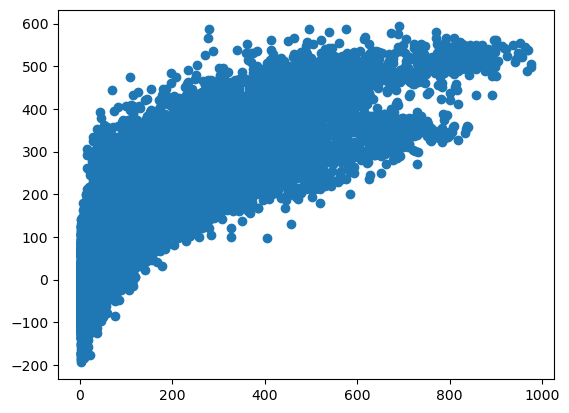

In [39]:
plt.scatter(Y_cnt.flatten(), Y_pred_1.flatten())
plt.show()

## 4.3 Comparación con STATSMODEL

In [40]:
# usamos statmodels para comparar su modelo con el modelo obtenido
model = OLS(Y_cnt,X_1)
result = model.fit()

result.params

array([130.93698006,  44.37646521, -12.24477573,  -3.56001064,
        42.9048052 , -59.34552453, -52.68642529,  -3.16589538,
        -1.30717759,   1.91613731,  -3.71875567,  -7.41872407,
       -29.09906582, 159.21841693,  -5.3648925 ,  45.22417129,
        18.85576016,  54.29276832, -12.05537718, -67.44843294,
       -59.80112305])

In [42]:
comparativa_params = pd.DataFrame({
        'Matricial': B_cnt.flatten(),
        'Stats Models': result.params
    })

comparativa_params

,Matricial,Stats Models
0,130.936980,130.936980
1,44.376465,44.376465
2,-12.244776,-12.244776
3,-3.560011,-3.560011
4,42.904805,42.904805
5,-59.345525,-59.345525
6,-52.686425,-52.686425
7,-3.165895,-3.165895
8,-1.307178,-1.307178
9,1.916137,1.916137


Como se puede observar, los parametros obtenidos coinciden exactamente con los obtenidos usando la forma matricial. Finalmente, guardamos los parámetros de nuestro modelo.

In [43]:
X_1.dump('../Data/X.dat')
B_cnt.dump('../Data/B.dat')
Y_cnt.dump('../Data/Y.dat')

In [44]:
df[regressor_columns + target_column].to_csv('../Data/hour-Processed2.csv')

In [45]:
result.save("../Data/ols_results.pickle")

In [46]:
with open("../Data/regressor_columns.pickle", "wb") as fp:   #Pickling
...   pickle.dump(regressor_columns, fp)